In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
from matplotlib import rc

In [2]:
def load_data(filename='csv/results_cff.csv', seeds=range(1,5)):
    # load df 
    df_data = pd.read_csv(filename)
    # df_data = df_data.sort_values('time_loopless_fba')
    # print(df_data)
    data = {}
    data["organism"] = df_data["organism"]

    # ll fba data
    data["time_ll_fba"] = df_data["time_loopless_fba"].to_list()
    for seed in seeds:
        data["time_ll_fba_" + str(seed)] = df_data["time_loopless_fba_blocked_10_1800_scip_seed_" + str(seed)].to_list()

    # cycles blocked 
    data["time_ll_fba_blocked_10"] = df_data["time_loopless_fba_blocked_10"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_10_" + str(seed)] = df_data["time_loopless_fba_blocked_10_1800_scip_seed_" + str(seed)].to_list()
    data["time_ll_fba_blocked_20"] = df_data["time_loopless_fba_blocked_20"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_20_" + str(seed)] = df_data["time_loopless_fba_blocked_20_1800_scip_seed_" + str(seed)].to_list()
    data["time_ll_fba_blocked_50"] = df_data["time_loopless_fba_blocked_50"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_50_" + str(seed)] = df_data["time_loopless_fba_blocked_50_1800_scip_seed_" + str(seed)].to_list()
    data["time_ll_fba_blocked_100"] = df_data["time_loopless_fba_blocked_100"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_100_" + str(seed)] = df_data["time_loopless_fba_blocked_100_1800_scip_seed_" + str(seed)].to_list()

    # shortest cycles blocked
    data["time_ll_fba_blocked_shortest_cycles_10"] = df_data["time_loopless_fba_blocked_shortest_cycles_10"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_shortest_cycles_10_" + str(seed)] = df_data["time_loopless_fba_blocked_shortest_cycles_10_1800_scip_seed_" + str(seed)].to_list()
    data["time_ll_fba_blocked_shortest_cycles_20"] = df_data["time_loopless_fba_blocked_shortest_cycles_20"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_shortest_cycles_20_" + str(seed)] = df_data["time_loopless_fba_blocked_shortest_cycles_20_1800_scip_seed_" + str(seed)].to_list()
    data["time_ll_fba_blocked_shortest_cycles_50"] = df_data["time_loopless_fba_blocked_shortest_cycles_50"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_shortest_cycles_50_" + str(seed)] = df_data["time_loopless_fba_blocked_shortest_cycles_50_1800_scip_seed_" + str(seed)].to_list()
    data["time_ll_fba_blocked_shortest_cycles_100"] = df_data["time_loopless_fba_blocked_shortest_cycles_100"].to_list()
    for seed in seeds:
        data["time_ll_fba_blocked_shortest_cycles_100_" + str(seed)] = df_data["time_loopless_fba_blocked_shortest_cycles_100_1800_scip_seed_" + str(seed)].to_list()
    
    return data 

In [3]:
def append_row(df, row):
    return pd.concat([
                df, 
                pd.DataFrame([row], columns=row.index)]
           ).reset_index(drop=True)

In [4]:
def build_df_in_sns_format(load_from="csv/results_cff.csv", limits=[10,20,50,100]):
    data = load_data(load_from)
    df_data = pd.DataFrame.from_dict(data)
    df_data = df_data.sort_values('time_ll_fba')

    organisms = list(df_data["organism"])
    setups = []
    for limit in limits:
        setups.append("ll_fba")
        setups.append("ll_fba_blocked_" + str(limit))
        setups.append("ll_fba_blocked_shortest_cycles_" + str(limit))
        
    cols = [col for col in df_data if col != "organism"]
    
    order_dict = {
        "e_coli_core":1,
        "iCN900":2,
        "iAF692":3,
        "iJR904":4,
        "iNJ661":5,
        "iEK1008":6,
        "iMM904":7,
        "iSFV_1184":8,
        "iML1515":9,
    }
    
    df = pd.DataFrame()
    for row_idx, row in df_data.iterrows():
        # print(row)
        for col_name in df_data:
            if col_name != "organism":
                limit = col_name.replace("time_ll_fba_blocked_shortest_cycles_", "")
                limit = limit.replace("time_ll_fba_blocked_", "")
                if limit == "time_ll_fba":
                    limit = 0
                    seed = 0
                    setup = limit
                elif "time_ll_fba" in limit:
                    seed = limit.replace("time_ll_fba_", "")
                    setup = "time_ll_fba"
                    limit = 0
                elif "_" in limit:
                    limit, seed = limit.split("_")
                    setup = col_name[:-2]
                else:
                    seed = "0"
                    setup = col_name
                time = row[col_name]
    
                # print(time, row.organism, setup, seed)
                new_row = pd.Series({"time":float(time), "organism":row.organism, "setup":setup, "seed":int(seed), "x_axis":order_dict[row.organism]})
                df = append_row(df, new_row)

    # # sort organisms
    # x_axis = [3,4,9,1,5,2,6,7,8]
    # dict = {'organism':organisms, 'x_axis':x_axis}
    # organism_position = pd.DataFrame.from_dict(dict)
    # df['organism'] = df['organism'].astype("string")
    # organism_position['organism'] = df['organism'].astype("string")
    # print(organism_position.dtypes)
    # print(df.dtypes)
    # df.join(organism_position, on='organism', how="left")

    return df
            

In [5]:
df = build_df_in_sns_format()

In [6]:
df

,time,organism,setup,seed,x_axis
0,0.060962,e_coli_core,0,0,1
1,0.121521,e_coli_core,time_ll_fba,1,1
2,0.125623,e_coli_core,time_ll_fba,2,1
3,0.136882,e_coli_core,time_ll_fba,3,1
4,0.122390,e_coli_core,time_ll_fba,4,1
...,...,...,...,...,...
400,36.716294,iNJ661,time_ll_fba_blocked_shortest_cycles_100,0,5
401,35.577696,iNJ661,time_ll_fba_blocked_shortest_cycles_100,1,5
402,35.793376,iNJ661,time_ll_fba_blocked_shortest_cycles_100,2,5
403,39.554901,iNJ661,time_ll_fba_blocked_shortest_cycles_100,3,5


In [7]:
def build_solved_instances_plot(save_as):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "lmodern"
    })
    
    df = build_df_in_sns_format()
    fig, axs = plt.subplots(1, 1, figsize=[8.0, 3.8]) #, layout='constrained')
    # ax = sns.boxplot(data=df, 
    #              x="organism", 
    #              y="time",
    #              hue="setup", 
    #              hue_order=[
    #                  'time_ll_fba',
    #                  'time_ll_fba_blocked_10',
    #                  'time_ll_fba_blocked_100',
    #                  'time_ll_fba_blocked_20',
    #                  'time_ll_fba_blocked_50',
    #                  'time_ll_fba_blocked_shortest_cycles_10',
    #                  'time_ll_fba_blocked_shortest_cycles_100',
    #                  'time_ll_fba_blocked_shortest_cycles_20',
    #                  'time_ll_fba_blocked_shortest_cycles_50'
    #              ], 
    #              orient="v",
    #              boxprops={'alpha': 0.4},
    #             )

    ax = sns.stripplot(
        data=df, 
        x="x_axis", 
        y="time",
        hue="setup", 
        hue_order=[
            'time_ll_fba',
            'time_ll_fba_blocked_10',
            'time_ll_fba_blocked_20',
            'time_ll_fba_blocked_50',
            'time_ll_fba_blocked_100',
            'time_ll_fba_blocked_shortest_cycles_10',
            'time_ll_fba_blocked_shortest_cycles_20',
            'time_ll_fba_blocked_shortest_cycles_50',
            'time_ll_fba_blocked_shortest_cycles_100',
        ],  
        dodge=True,
        size=5.0,
        jitter=False,
        alpha=0.7,
        # ax=ax
    )

    axs.set_ylabel(r"$\textbf{time (s)}$")
    axs.set_xlabel(r"$\textbf{models}$")
    ax.yaxis.grid(True)
    axs.get_legend().remove()
    axs.axvline(0.5, color='gray', linewidth=0.5)
    axs.axvline(1.5, color='gray', linewidth=0.5)
    axs.axvline(2.5, color='gray', linewidth=0.5)
    axs.axvline(3.5, color='gray', linewidth=0.5)
    axs.axvline(4.5, color='gray', linewidth=0.5)
    axs.axvline(5.5, color='gray', linewidth=0.5)
    axs.axvline(6.5, color='gray', linewidth=0.5)
    axs.axvline(7.5, color='gray', linewidth=0.5)
    axs.axvline(8.5, color='gray', linewidth=0.5)

    labels = [
        "e_coli_core",
        "iCN900",
        "iAF692",
        "iJR904",
        "iNJ661",
        "iEK1008",
        "iMM904",
        "iSFV_1184",
        "iML1515"
    ]
    axs.set_xticklabels(labels)

    lines = []
    labels = []
    for ax in fig.axes:
        Line, list_of_labels = ax.get_legend_handles_labels()
        lines.extend(Line)
        list_of_updated_labels = []
        for label in list_of_labels:
            label = label.replace("time_", "")
            label = label.replace("cycles_", "")
            label = label.replace("ll_fba", "ll-FBA (big-M)")
            label = label.replace("_", " ")
            list_of_updated_labels.append(label)            
        labels.extend(list_of_updated_labels)

        
    fig.legend(lines, labels, loc='center', bbox_to_anchor=(0.52, -0.3), ncol=2)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.xticks(rotation=60)
    # plt.show()
    plt.savefig(save_as, format="pdf", bbox_inches="tight")
    # plt.clf()


/home/htroppen/anaconda3/envs/my_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/htroppen/anaconda3/envs/my_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_77903/2358063175.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(labels)


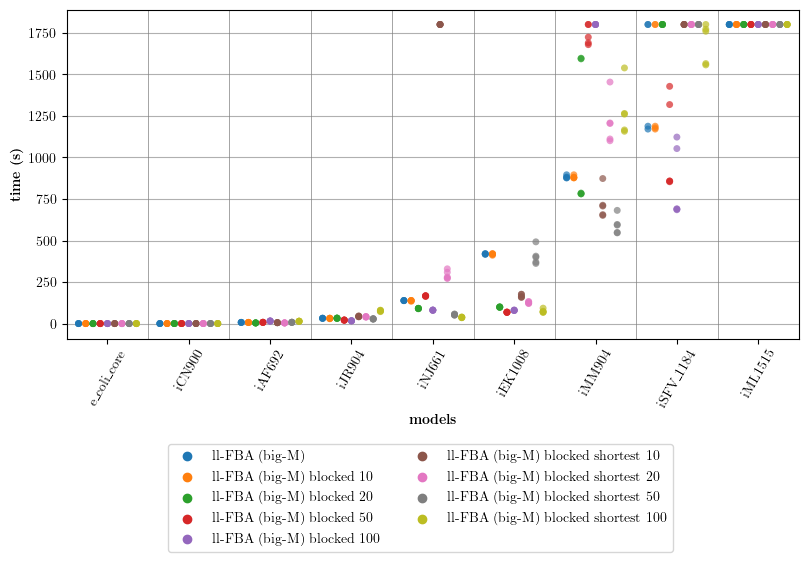

In [8]:
# make plots
build_solved_instances_plot(save_as="plots/cff_comparison_boxplot.pdf")

In [9]:
# 
df_ll_fba = df[df["setup"]=="time_ll_fba"]
df_ll_fba.groupby("organism").time.agg(["mean", "min", "max"])

,mean,min,max
organism,,,
e_coli_core,0.126604,0.121521,0.136882
iAF692,7.093000,7.027633,7.155670
iCN900,0.249029,0.247658,0.250324
iEK1008,418.943430,417.094923,421.231764
iJR904,31.890010,31.795673,32.098601
iML1515,1800.000679,1800.000513,1800.000991
iMM904,882.804732,876.545663,895.417362
iNJ661,138.515264,138.018933,138.959782
iSFV_1184,1489.588191,1170.488345,1800.001946
